In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import regex
import seaborn as sns
import numpy as np

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df_starbucks = pd.read_csv('directory.csv')
df_starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df_starbucks = df_starbucks[(df_starbucks['Brand'] == 'Starbucks')]
df_starbucks = df_starbucks[df_starbucks['Country'] == 'US'].reset_index(drop=True)
df_starbucks.shape

(13311, 13)

In [5]:
df_cityre = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df_cityre.shape

(26705, 301)

In [6]:
df_city50 = df_cityre[0:50]
df_city50.shape

(50, 301)

In [7]:
top50_rev = df_city50[['RegionName', 'StateName', '2017-01-31']]
top50_rev = top50_rev.rename(columns={"RegionName": "City", "StateName": "State", "2017-01-31": "RE_Value"})
top50_rev.head()

,City,State,RE_Value
0,New York,NY,584490.0
1,Los Angeles,CA,636974.0
2,Houston,TX,170083.0
3,Chicago,IL,233162.0
4,San Antonio,TX,161663.0


In [8]:
mask = list(df_city50['RegionName'])
top50_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
top50_star_count = top50_star['City'].value_counts().rename_axis('City').reset_index(name = 'NumStarbucks')
top50_star_count.tail()

,City,NumStarbucks
45,Milwaukee,21
46,El Paso,21
47,Cleveland,19
48,Oklahoma City,15
49,Detroit,10


In [9]:
rev_star = top50_star_count.merge(top50_rev, left_on = 'City', right_on = 'City')
#.drop('RegionName', inplace = True, axis = 1)
rev_star.head()

,City,NumStarbucks,State,RE_Value
0,New York,230,NY,584490.0
1,Chicago,179,IL,233162.0
2,Las Vegas,153,NV,217354.0
3,Seattle,151,WA,637004.0
4,Houston,151,TX,170083.0


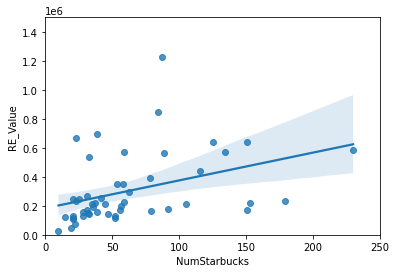

In [10]:
h = sns.regplot(data = rev_star, x = 'NumStarbucks', y = 'RE_Value')
h.set(xlim = (0, 250), ylim = (0, 1500000))
plt.show()

In [11]:
#!conda install xlrd
#pop_df = pd.read_excel('SUB-IP-EST2019-ANNRES.xlsx')
#pop_df.head()

df_population = pd.read_csv('sub-est2019_all.csv', encoding = 'cp1252')
df_population.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


In [12]:
df_cities = df_population[(df_population['SUMLEV']== 162)]
df_cities_200 = df_cities.sort_values('POPESTIMATE2017', ascending = False)[0:200]
df_cities_200.shape

(200, 22)

In [13]:
df_cities_features = df_cities_200[['NAME', 'POPESTIMATE2017', 'STNAME']]
df_cities_features['City'] = df_cities_features['NAME'].str.split(pat = ' town$| city$').str[0]
df_cities_features = df_cities_features.drop(['NAME'], axis = 1)
df_cities_features = df_cities_features.rename(columns = {'POPESTIMATE2017': '2017_Population', 'STNAME':'State'})
df_cities_features.head()

C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2017_Population,State,City
46586,8437478,New York,New York
3092,3975788,California,Los Angeles
8173,2711069,Illinois,Chicago
71676,2316750,Texas,Houston
1512,1633560,Arizona,Phoenix


In [14]:
df_cities_features['State'].replace(us_state_abbrev, inplace = True)
#mask_state = list(df_city50['StateName'])
 
df_select_cities = df_cities_features[df_cities_features['City'].str.lower().isin([x.lower() for x in mask])]
df_select_cities = df_select_cities.reset_index(drop = True)
df_select_cities.head()

,2017_Population,State,City
0,8437478,NY,New York
1,3975788,CA,Los Angeles
2,2711069,IL,Chicago
3,2316750,TX,Houston
4,1633560,AZ,Phoenix


In [15]:
final_df = rev_star.merge(df_select_cities, left_on = 'City', right_on = 'City')
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y
0,New York,230,NY,584490.0,8437478,NY
1,Chicago,179,IL,233162.0,2711069,IL
2,Las Vegas,153,NV,217354.0,635262,NV
3,Seattle,151,WA,637004.0,728661,WA
4,Houston,151,TX,170083.0,2316750,TX


In [16]:
final_df = final_df[final_df['State_x'] == final_df['State_y']]
final_df['Starbucks_percap'] = final_df['NumStarbucks'] / final_df['2017_Population']
final_df.head()

,City,NumStarbucks,State_x,RE_Value,2017_Population,State_y,Starbucks_percap
0,New York,230,NY,584490.0,8437478,NY,0.000027
1,Chicago,179,IL,233162.0,2711069,IL,0.000066
2,Las Vegas,153,NV,217354.0,635262,NV,0.000241
3,Seattle,151,WA,637004.0,728661,WA,0.000207
4,Houston,151,TX,170083.0,2316750,TX,0.000065


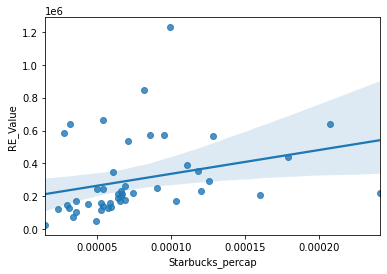

In [17]:
g = sns.regplot(x = 'Starbucks_percap', y = 'RE_Value', data = final_df)
plt.show()

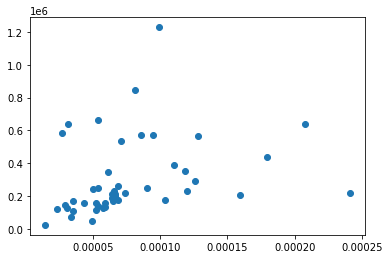

In [18]:
x, y = final_df['Starbucks_percap'], final_df['RE_Value']

plt.clf()
plt.scatter(x, y)

plt.show()

In [19]:
df_cityre_200 = df_cityre[0:200]
df_cityre_200.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [20]:
df_cityre_select = df_cityre.iloc[:, np.r_[0:7, range(-41,0)]]
df_cityre_select.drop('StateName', axis = 1, inplace = True)
df_cityre_select.dropna(inplace = True)

C:\Users\tpacu\miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
changes = df_cityre_select.iloc[:, 6:]
changes.dropna(inplace= True)
changes

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,584490.0,587315.0,590243.0,592324.0,595751.0,599203.0,603736.0,607641.0,611651.0,616185.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,636974.0,640135.0,643839.0,646233.0,651055.0,655208.0,660034.0,664198.0,668149.0,671498.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,170083.0,170522.0,171082.0,172015.0,172581.0,173043.0,173292.0,173521.0,173875.0,174318.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,233162.0,234143.0,236057.0,237438.0,238574.0,239067.0,239566.0,240505.0,241764.0,242599.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,161663.0,163379.0,164425.0,164774.0,164967.0,165565.0,166487.0,167557.0,168592.0,169684.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,132381.0,132646.0,132602.0,132648.0,133244.0,134302.0,135348.0,136471.0,137305.0,138141.0,...,145798.0,146377.0,147118.0,147499.0,147782.0,148093.0,148562.0,148988.0,149406.0,149545.0
26699,83500.0,85415.0,86941.0,87667.0,86603.0,84199.0,82844.0,81508.0,80767.0,79503.0,...,83956.0,84150.0,85121.0,85934.0,86933.0,87845.0,88963.0,89846.0,90470.0,90414.0
26700,61109.0,61087.0,60975.0,61317.0,61791.0,62468.0,62610.0,62865.0,63082.0,63348.0,...,67248.0,67708.0,68196.0,68612.0,69200.0,69600.0,69863.0,69915.0,70579.0,71227.0
26701,23938.0,24048.0,23915.0,23838.0,23563.0,23428.0,23394.0,23222.0,22987.0,22654.0,...,24925.0,25458.0,26044.0,26428.0,26530.0,26562.0,26667.0,26919.0,27149.0,27590.0


In [22]:
changes_chart = changes.diff(axis = 1)
changes_chart

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,2825.0,2928.0,2081.0,3427.0,3452.0,4533.0,3905.0,4010.0,4534.0,...,-786.0,-1286.0,-1221.0,-1058.0,-241.0,254.0,9.0,-848.0,-140.0,-621.0
1,NaN,3161.0,3704.0,2394.0,4822.0,4153.0,4826.0,4164.0,3951.0,3349.0,...,2174.0,2593.0,3288.0,2378.0,3702.0,3481.0,5558.0,5051.0,3758.0,-84.0
2,NaN,439.0,560.0,933.0,566.0,462.0,249.0,229.0,354.0,443.0,...,599.0,402.0,598.0,447.0,519.0,154.0,471.0,887.0,1077.0,871.0
3,NaN,981.0,1914.0,1381.0,1136.0,493.0,499.0,939.0,1259.0,835.0,...,101.0,-226.0,-195.0,-187.0,-70.0,175.0,353.0,521.0,207.0,131.0
4,NaN,1716.0,1046.0,349.0,193.0,598.0,922.0,1070.0,1035.0,1092.0,...,593.0,918.0,626.0,716.0,111.0,459.0,57.0,459.0,24.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,NaN,265.0,-44.0,46.0,596.0,1058.0,1046.0,1123.0,834.0,836.0,...,671.0,579.0,741.0,381.0,283.0,311.0,469.0,426.0,418.0,139.0
26699,NaN,1915.0,1526.0,726.0,-1064.0,-2404.0,-1355.0,-1336.0,-741.0,-1264.0,...,234.0,194.0,971.0,813.0,999.0,912.0,1118.0,883.0,624.0,-56.0
26700,NaN,-22.0,-112.0,342.0,474.0,677.0,142.0,255.0,217.0,266.0,...,233.0,460.0,488.0,416.0,588.0,400.0,263.0,52.0,664.0,648.0
26701,NaN,110.0,-133.0,-77.0,-275.0,-135.0,-34.0,-172.0,-235.0,-333.0,...,286.0,533.0,586.0,384.0,102.0,32.0,105.0,252.0,230.0,441.0


In [23]:
percentage_chart = (changes_chart.iloc[:, 1:] / changes) * 100
#percentage_chart.dropna(inplace = True)
percentage_chart

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,0.481003,0.496067,0.351328,0.575240,0.576099,0.750825,0.642649,0.655603,0.735818,...,-0.119701,-0.196231,-0.186660,-0.162004,-0.036916,0.038892,0.001378,-0.130012,-0.021469,-0.095321
1,NaN,0.493802,0.575299,0.370455,0.740644,0.633845,0.731174,0.626921,0.591335,0.498736,...,0.300781,0.357469,0.451236,0.325288,0.503848,0.471535,0.747259,0.674514,0.499340,-0.011163
2,NaN,0.257445,0.327328,0.542395,0.327962,0.266986,0.143688,0.131972,0.203595,0.254133,...,0.315625,0.211374,0.313447,0.233751,0.270668,0.080249,0.244837,0.458967,0.554192,0.446191
3,NaN,0.418975,0.810821,0.581626,0.476163,0.206218,0.208293,0.390428,0.520756,0.344189,...,0.040117,-0.089847,-0.077583,-0.074456,-0.027879,0.069649,0.140294,0.206635,0.082032,0.051887
4,NaN,1.050319,0.636156,0.211805,0.116993,0.361187,0.553797,0.638589,0.613908,0.643549,...,0.319258,0.491801,0.334246,0.380845,0.059007,0.243407,0.030218,0.242743,0.012691,0.070279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26698,NaN,0.199780,-0.033182,0.034678,0.447300,0.787777,0.772823,0.822885,0.607407,0.605179,...,0.460226,0.395554,0.503677,0.258307,0.191498,0.210003,0.315693,0.285929,0.279775,0.092949
26699,NaN,2.241995,1.755213,0.828134,-1.228595,-2.855141,-1.635604,-1.639103,-0.917454,-1.589877,...,0.278717,0.230541,1.140729,0.946075,1.149161,1.038192,1.256702,0.982793,0.689731,-0.061937
26700,NaN,-0.036014,-0.183682,0.557757,0.767102,1.083755,0.226801,0.405631,0.343997,0.419903,...,0.346479,0.679388,0.715584,0.606308,0.849711,0.574713,0.376451,0.074376,0.940790,0.909767
26701,NaN,0.457418,-0.556136,-0.323014,-1.167084,-0.576234,-0.145336,-0.740677,-1.022317,-1.469939,...,1.147442,2.093644,2.250038,1.453004,0.384470,0.120473,0.393745,0.936142,0.847177,1.598405


In [24]:
annual_chart = changes.iloc[:, ::12]
annual_percent = annual_chart.diff(axis = 1)
#annual_percent = annual_percent / changes
#annual_percent = annual_percent.drop('2017-01-31', axis = 1)
annual_percent = (annual_percent / changes.iloc[:, ::12]) * 100
annual_percent

,2017-01-31,2018-01-31,2019-01-31,2020-01-31
0,NaN,6.470376,5.041893,-0.768813
1,NaN,7.426392,4.206263,2.701202
2,NaN,3.325679,5.619870,2.861877
3,NaN,5.164728,2.131640,0.018308
4,NaN,5.454705,5.270273,4.279510
...,...,...,...,...
26698,NaN,5.103226,1.590079,4.280418
26699,NaN,-6.158462,7.131388,3.584723
26700,NaN,2.297509,4.995823,5.409483
26701,NaN,-5.625910,3.852191,11.260447


In [25]:
#insert RegionName, State
#changes_merge = 

In [26]:
mask = list(df_cityre['RegionName'])
us_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
us_star_count = us_star.groupby(['State/Province', 'City']).size().reset_index()
print(us_star_count.head())

  State/Province         City   0
0             AK    Anchorage  23
1             AK  Eagle River   3
2             AK    Fairbanks   5
3             AK        Homer   1
4             AK       Juneau   2


In [27]:
finaldataframe = pd.merge_ordered(left = us_star_count, right = df_cityre, left_on = ['City', 'State/Province'], right_on = ['RegionName', 'State'], how = 'right')
finaldataframe.rename(columns = {0: 'SBC'}, inplace = True)
finaldataframe.drop(['State/Province', 'City'], axis = 1, inplace = True)
finaldataframe.head()

,SBC,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,50631,29449,Aaronsburg,City,PA,PA,State College,Centre County,NaN,...,189327.0,189220.0,190406.0,190708.0,190633.0,190957.0,191563.0,192705.0,193022.0,192948.0
1,NaN,10031,7250,Abbeville,City,AL,AL,Dothan,Henry County,NaN,...,88631.0,89032.0,89423.0,89658.0,89783.0,89965.0,90169.0,90486.0,90938.0,91313.0
2,NaN,50632,9494,Abbeville,City,GA,GA,NaN,Wilcox County,NaN,...,71650.0,71936.0,71983.0,71913.0,71795.0,71846.0,71962.0,72068.0,71992.0,72070.0
3,NaN,23389,2216,Abbeville,City,LA,LA,Lafayette,Vermilion Parish,NaN,...,132088.0,132046.0,131885.0,131645.0,131266.0,130901.0,131159.0,131120.0,131846.0,131879.0
4,NaN,30113,13553,Abbeville,City,MS,MS,Oxford,Lafayette County,NaN,...,130415.0,130692.0,131236.0,131878.0,132484.0,132508.0,132583.0,132710.0,132668.0,132358.0


In [28]:
finaldataframe['SBC'].fillna(0, inplace = True)
finaldataframe.head(25)

,SBC,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,0.0,50631,29449,Aaronsburg,City,PA,PA,State College,Centre County,NaN,...,189327.0,189220.0,190406.0,190708.0,190633.0,190957.0,191563.0,192705.0,193022.0,192948.0
1,0.0,10031,7250,Abbeville,City,AL,AL,Dothan,Henry County,NaN,...,88631.0,89032.0,89423.0,89658.0,89783.0,89965.0,90169.0,90486.0,90938.0,91313.0
2,0.0,50632,9494,Abbeville,City,GA,GA,NaN,Wilcox County,NaN,...,71650.0,71936.0,71983.0,71913.0,71795.0,71846.0,71962.0,72068.0,71992.0,72070.0
3,0.0,23389,2216,Abbeville,City,LA,LA,Lafayette,Vermilion Parish,NaN,...,132088.0,132046.0,131885.0,131645.0,131266.0,130901.0,131159.0,131120.0,131846.0,131879.0
4,0.0,30113,13553,Abbeville,City,MS,MS,Oxford,Lafayette County,NaN,...,130415.0,130692.0,131236.0,131878.0,132484.0,132508.0,132583.0,132710.0,132668.0,132358.0
5,0.0,37041,4045,Abbeville,City,SC,SC,Greenwood,Abbeville County,55476.0,...,133378.0,133842.0,134719.0,135131.0,135719.0,135597.0,135633.0,135739.0,136239.0,136781.0
6,0.0,398289,23495,Abbot,City,ME,ME,NaN,Piscataquis County,NaN,...,131585.0,132978.0,133333.0,133946.0,133940.0,134504.0,134934.0,135914.0,137201.0,138679.0
7,0.0,23390,13272,Abbotsford,City,WI,WI,NaN,Clark County,NaN,...,119355.0,119441.0,119813.0,120090.0,120430.0,120543.0,120669.0,120629.0,120566.0,120589.0
8,0.0,37042,20624,Abbott,City,TX,TX,NaN,Hill County,NaN,...,144991.0,145722.0,146355.0,147173.0,147568.0,148131.0,148314.0,148606.0,148585.0,148768.0
9,0.0,43810,26932,Abbottstown,City,PA,PA,Gettysburg,Adams County,94328.0,...,183619.0,183702.0,184567.0,185158.0,185504.0,185712.0,186133.0,186781.0,187037.0,186645.0


In [29]:
# Finishing National Section
# write a lambda to compare 'RegionType and State/Province' and change 	State/Province	City	0	 to null if not matched
#drop state/Province, City
#check for null values in none starbucks count and then fill null values with 0
#Finished Df!

# Build deltas chart and annual deltas chart

# train test split classification unsupervised ML on set
#graphs - 1. starbucks locations and real estate values
# 2. starbucks locations per capita and real estate values
# 3. Clustering/classifying of graph two (ML tech)(but only on two dimensions? SVM)
# 4. Graph of monthly real estate value by classifications from 2017 to present
# 5. bar chart of annual returns 2017 to present
#National section done

In [30]:
from sklearn.cluster import KMeans

In [95]:
kmeancluster = 5
model = KMeans(n_clusters = kmeancluster)

data_samples = finaldataframe['SBC'].values.reshape(-1,1)
model.fit(data_samples)
labels = model.predict(data_samples)
finaldataframe['Labels'] = labels
finaldataframe['Labels'].value_counts()
finaldataframe['TotalPct'] = ((finaldataframe['2020-05-31'] / finaldataframe['2017-01-31']) - 1) * 100


KeyError: '2017-01-31'

In [32]:
finaldataframe['Labels'].value_counts()

0    25938
4      673
2       71
3       16
1        7
Name: Labels, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

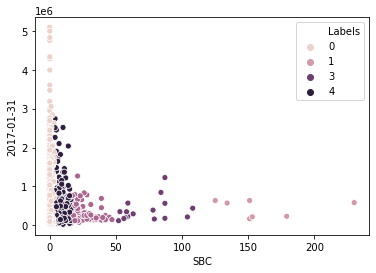

In [33]:
sns.scatterplot(x ='SBC', y = '2017-01-31', data = finaldataframe, hue = 'Labels')
plt.show

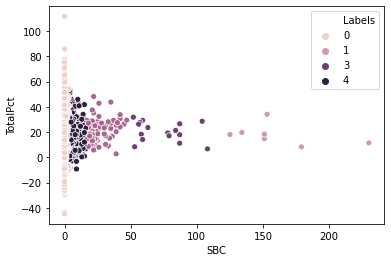

In [34]:
g = sns.scatterplot(x = 'SBC', y = 'TotalPct', data = finaldataframe, hue = 'Labels')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

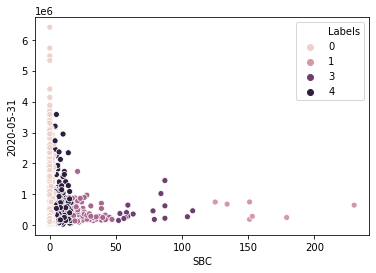

In [35]:
sns.scatterplot(x ='SBC', y = '2020-05-31', data = finaldataframe, hue = 'Labels')
plt.show

In [112]:
means = pd.DataFrame(pd.np.empty((0, 41)), columns = percentage_chart.columns)
for label in range(kmeancluster):
    selected_frame = finaldataframe['Labels'] == label
    selected_diff = percentage_chart[selected_frame]
    means.loc[label] = selected_diff.mean()
means

C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,0.384860,0.401154,0.423701,0.433520,0.428422,0.414899,0.431574,0.445918,0.457586,...,0.336013,0.333651,0.319424,0.274442,0.271298,0.276734,0.293134,0.288829,0.269980,0.235291
1,NaN,0.677846,0.274489,0.215825,0.335540,0.818620,0.290687,0.181485,-0.118636,0.490098,...,0.672069,0.551283,0.262007,-0.099118,-0.152784,-0.055513,-0.008130,0.037068,0.007117,0.030100
2,NaN,0.248632,0.389458,0.361488,0.476459,0.353335,0.299602,0.310169,0.426375,0.469147,...,0.289765,0.260115,0.227920,0.163015,0.193584,0.231348,0.261288,0.297489,0.302732,0.293124
3,NaN,0.507256,0.476495,0.278259,0.443187,0.564627,0.529310,0.448106,0.192034,0.371193,...,0.573471,0.508509,0.360987,0.398119,0.420241,0.379919,0.152287,0.104337,-0.063261,-0.077565
4,NaN,0.345225,0.351291,0.378428,0.424180,0.446312,0.446785,0.447385,0.437714,0.436633,...,0.309114,0.317288,0.311254,0.278837,0.260317,0.270753,0.287285,0.275952,0.247825,0.215504


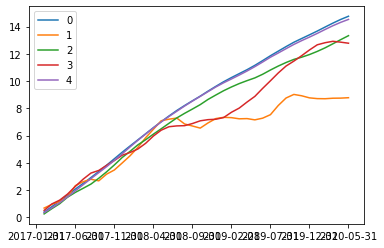

In [113]:
means.T.cumsum().plot.line()

In [125]:
medians = pd.DataFrame(pd.np.empty((0, 41)), columns = percentage_chart.columns)
for label in range(kmeancluster):
    selected_frame = finaldataframe['Labels'] == label
    printer_frame = finaldataframe[selected_frame]
    print(label, ':  Number of Entries:', len(printer_frame), 'Max: ', printer_frame['SBC'].max(), 'Min: ', printer_frame['SBC'].min())
    selected_diff = percentage_chart[selected_frame]
    medians.loc[label] = selected_diff.median()


C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0 :  Number of Entries: 25938 Max:  3.0 Min:  0.0
1 :  Number of Entries: 7 Max:  230.0 Min:  125.0
2 :  Number of Entries: 96 Max:  47.0 Min:  15.0
3 :  Number of Entries: 16 Max:  108.0 Min:  52.0
4 :  Number of Entries: 648 Max:  14.0 Min:  4.0


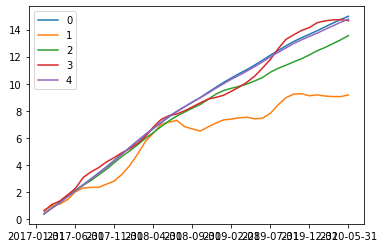

In [126]:
medians.T.cumsum().plot.line()